### Forward Euler for single-variable model
We will develop code to use the forward Euler method to solve a single variable ODE, then test it with the "test" equation (the degradation model).

First, make a single-variable degradation model.

In [114]:
import numpy as np
import scipy.integrate

def degradation_model( t, y, params ):
    dydt = -params[0] * y;
    return dydt

### Write the method

The method should take in a function handle, the array of time steps, the initial value of y0 (a single state), and an array of params (though it will have only one entry).

The outline is this

- Make a 2D array to hold Y (1 x NT) 
- Set the value for the first time step
- for each of the remaining time steps
    - compute dydt at current time step
    - set value of Y at next time step using Euler method
    
The Euler method as we wrote in the notes is
\begin{equation*}
\widehat{y}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot f(t,\widehat{y}(t))
\end{equation*}

and since this is the code version, we really should add a vector of parameters to the function, i.e.

\begin{equation*}
\widehat{y}(t + \Delta t) = \widehat{y}(t) + \Delta t \cdot f(t,\widehat{y}(t),\vec{p})
\end{equation*}



In [115]:
def forwardEuler1D( fn, t, y0, params ):
    """ [t,y] = forwardEuler1D( fn, t, y0, params )
    Given a function handle fn for dydt, find the value of
    y at timepoints t, given y(0) = y0.
    fn takes t, y, and params as input.
    t is 1-dimensional (NT,)
    y is 2-dimensional (1,NT) (NOTE WE ASSUME WE HAVE JUST ONE VARIABLE)
    """
    y = np.zeros( (1,t.size) )
    y[0,0] = y0;
    for i in range(1,t.size):
        h = t[i]-t[i-1];
        yprime = fn(t[i-1],y[0,i-1],params);
        y[0,i] = y[0,i-1] + h*yprime;
    
    return (t,y)

### Compare the method's solution to the true solution

Make an array of time steps starting at t=0, ending at t=4, with a time step of 0.1. Use y0 = 1 and a degradation rate constant of 2. 

Evaluate the true solution at those time steps, then use forward Euler to approximate the true solution at those time steps.

Plot both solutions in an upper subplot and the difference between them in a lower subplot.

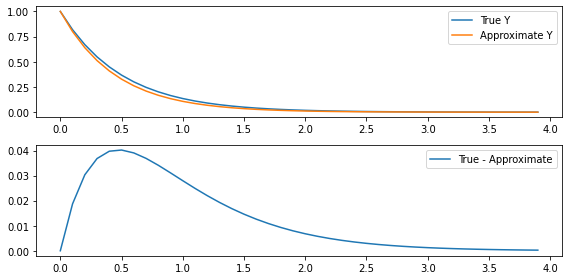

In [129]:
import matplotlib.pyplot as plt

params = np.array((2,))
dt = 0.1
y0 = 1
t = np.arange(0,4,dt)
tru_y = np.exp( -params[0]*t)
(t,y) = forwardEuler1D( degradation_model, t, y0=y0, params=params)

plt.figure( figsize = (8,4) )
plt.subplot(2,1,1)
plt.plot( t, tru_y)
plt.plot( t, y.T );
plt.legend( ['True Y','Approximate Y'])

plt.subplot(2,1,2)
plt.plot( t, tru_y - y[0,:].T);
plt.legend( ['True - Approximate'])

plt.tight_layout();

### Evaluate the effect of step size on the correctness

For values of $\Delta t$ = 0.001, 0.01, 0.1, and 0.2, simulate the model and plot the difference between the forward Euler solution and the true solution.

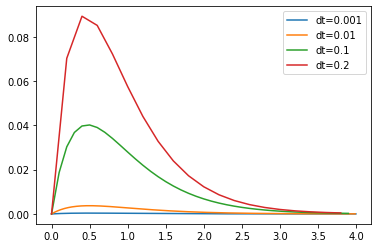

In [130]:
dts = np.array( [0.001,0.01,0.1,0.2])

for i in range(dts.size):
    t = np.arange(0,4,dts[i])
    tru_y = y0 * np.exp( -params[0]*t)
    (t,y) = forwardEuler1D( degradation_model, t, y0=1, params=params)
    plt.plot( t, tru_y-y[0,:].T )
plt.legend( ['dt=0.001','dt=0.01','dt=0.1','dt=0.2'] );

### What happens if the step size is way too big?

Use the forwardEuler method with $\Delta t$ = 1. Plot the solution along with the true solution.

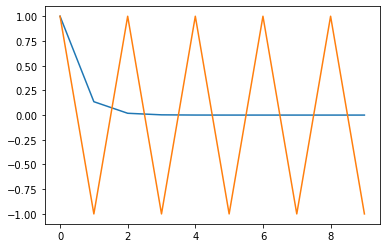

In [139]:
dt = 1
y0 = 1
t = np.arange(0,10,dt)
tru_y = np.exp( -params[0]*t)
(t,y) = forwardEuler1D( degradation_model, t, y0=y0, params=params)

plt.plot(t, tru_y)
plt.plot(t, y.T);

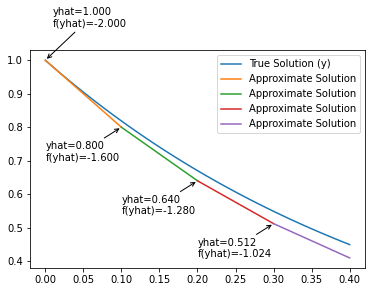

In [85]:
# Bonus cell. This is the cell Stephanie used to make a figure
# in the PDF lecture notes. It illustrates the first 5 steps
# taken to solve the test equation with a rate constant of 2
# and step size of 0.1.
params = np.array((2,))

y0 = 1
tru_ts = np.arange(0,0.41,0.01)
tru_y1 = y0*np.exp( -params[0]*tru_ts)

plt.plot( tru_ts, tru_y1 )

# Illustrate forward Euler for a few steps
# of size 0.1
ts = np.arange(0,0.5,0.1)
y = np.zeros((1,ts.size))
y[0,0] = y0
for i in range(1,ts.size):
    h = t[i]-t[i-1];
    yprime = degradation_model(t[i-1],y[0,i-1],params);
    y[0,i] = y[0,i-1] + h*yprime;
    plt.plot( (ts[i-1],ts[i]), (y[0,i-1], y[0,i]) )
    if i == 1:
        offsets = (0.01,0.1)
    else:
        offsets = (-0.1,-0.1)
    plt.annotate( "yhat=%0.3f\nf(yhat)=%0.3f"% (y[0,i-1],yprime), (ts[i-1],y[0,i-1]), (ts[i-1]+offsets[0],y[0,i-1]+offsets[1]), 
                  xycoords='data', arrowprops={'arrowstyle':'->'})
plt.legend(['True Solution (y)','Approximate Solution','Approximate Solution','Approximate Solution','Approximate Solution']);
    